# Longueur des poissons d'un lac

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

## Le dataset
#### On a pesé tous les poissons d'un lac. Il y a 10000 poissons dans le lac : 60% de perches et 40% de brochets.

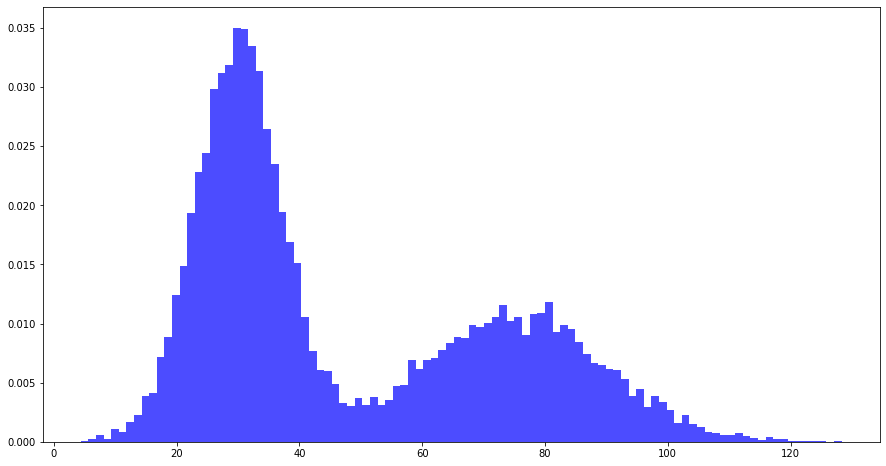

In [3]:
# Générer un dataset aléatoire de mesures de longueurs de poissons

data1 = np.random.normal(30, 7, 6000)  # perches
data2 = np.random.normal(75, 15, 4000) # brochets
data = np.concatenate((data1,data2))
plt.figure(figsize=(15,8))
plt.hist(data, bins=100, density=True, alpha=0.7, color='b')
plt.show()

## Les grandeurs statistiques de la population totale

In [4]:
N = len(data)            # N la taille de la population totale
mean_tot = data.mean()   # mean_pop la moyenne de la population totale
std_tot = data.std()     # std_pop l'écart-type de la population totale

print(f'Taille de la population : N = {N}\nMoyenne de la population : mean_tot = {round(mean_tot,2)}cm\nEcart-type de la population : std_tot = {round(std_tot,2)}cm')

Taille de la population : N = 10000
Moyenne de la population : mean_tot = 48.0cm
Ecart-type de la population : std_tot = 24.62cm


## On mesure la taille d'un échantillon aléatoire de taille n = 500

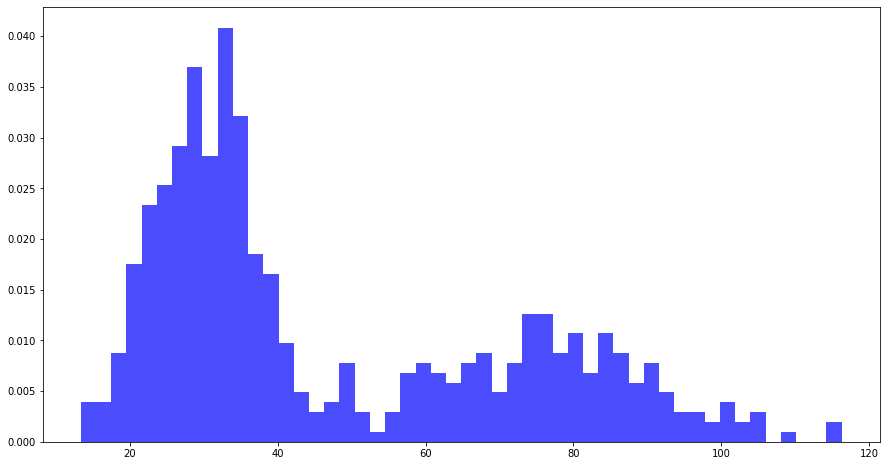

In [5]:
n = 500
sample = np.random.choice(data, n, replace=True)
plt.figure(figsize=(15,8))
plt.hist(sample, bins=50, density=True, alpha=0.7, color='b')
plt.show()

In [6]:
mean_sample_500 = sample.mean()  # mean_sample_500 la moyenne de l'échantillon
std_sample_500 = sample.std()    # std_sample_500 l'écart-type de l'échantillon

print(f'Taille de la population : n = {n}\nMoyenne de la population : mean_sample_500 = {round(mean_sample_500,2)}cm\nEcart-type de la population : std_sample_500 = {round(std_sample_500,2)}cm')

Taille de la population : n = 500
Moyenne de la population : mean_sample_500 = 47.17cm
Ecart-type de la population : std_sample_500 = 24.49cm


#### Si on n'avait pas les données de la population totale, on pourrait donner la valeur moyenne des poissons estimée à partir de l'échantillon précédent en donnant une incertitude à l'aide de l'erreur standard : $ste = \frac{std}{\sqrt N}$.

In [7]:
ste_sample_500 = std_sample_500/N**.5

print(f'La longueur moyenne des poissons pour la population totale est de {round(mean_sample_500, 2)}cm +- {round(ste_sample_500, 2)}cm avec un intervalle de confiance de 68%')
print(f'La longueur moyenne des poissons pour la population totale est de {round(mean_sample_500, 2)}cm +- {round(ste_sample_500*2, 2)}cm avec un intervalle de confiance de 95%')
print(f'La longueur moyenne des poissons pour la population totale est de {round(mean_sample_500, 2)}cm +- {round(ste_sample_500*3, 2)}cm avec un intervalle de confiance de 99,7%')
print(f'La moyenne réelle est de {round(mean_tot,2)}cm')

La longueur moyenne des poissons pour la population totale est de 47.17cm +- 0.24cm avec un intervalle de confiance de 68%
La longueur moyenne des poissons pour la population totale est de 47.17cm +- 0.49cm avec un intervalle de confiance de 95%
La longueur moyenne des poissons pour la population totale est de 47.17cm +- 0.73cm avec un intervalle de confiance de 99,7%
La moyenne réelle est de 48.0cm


## On refait la même chose pour un échantillon de taille 50

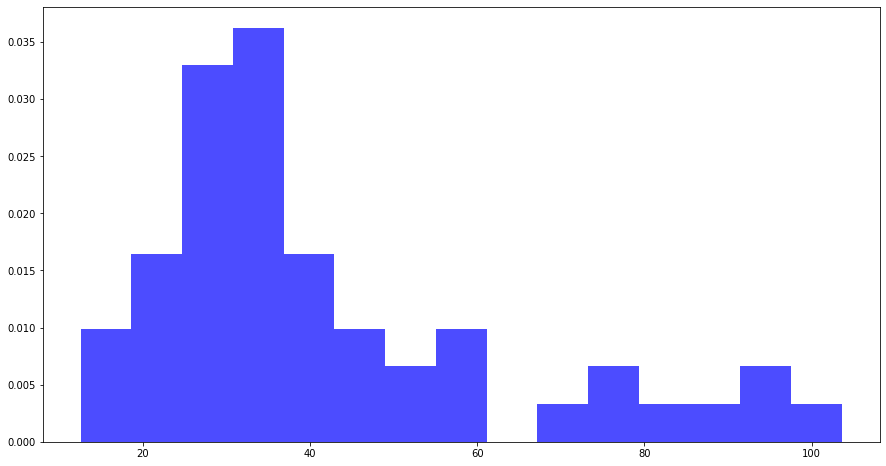

In [8]:
n = 50
sample = np.random.choice(data, n, replace=True)
plt.figure(figsize=(15,8))
plt.hist(sample, bins=15, density=True, alpha=0.7, color='b')
plt.show()

In [9]:
n = 50
mean_sample_50 = sample.mean()
std_sample_50 = sample.std()
ste_sample_50 = std_sample_50/n**.5

print(f'La longueur moyenne des poissons pour la population totale est de {round(mean_sample_50,2)}cm +- {round(ste_sample_50,2)}cm avec un intervalle de confiance de 68%')
print(f'La longueur moyenne des poissons pour la population totale est de {round(mean_sample_50,2)}cm +- {round(ste_sample_50*2,2)}cm avec un intervalle de confiance de 95%')
print(f'La longueur moyenne des poissons pour la population totale est de {round(mean_sample_50,2)}cm +- {round(ste_sample_50*3,2)}cm avec un intervalle de confiance de 99,7%')
print(f'La moyenne réelle est de {round(mean_tot,2)}cm')

La longueur moyenne des poissons pour la population totale est de 41.97cm +- 3.17cm avec un intervalle de confiance de 68%
La longueur moyenne des poissons pour la population totale est de 41.97cm +- 6.34cm avec un intervalle de confiance de 95%
La longueur moyenne des poissons pour la population totale est de 41.97cm +- 9.51cm avec un intervalle de confiance de 99,7%
La moyenne réelle est de 48.0cm


## Evolution de la standar error en fonction de la taille de l'échantillon

In [10]:
sample_lens = np.arange(50, 500, 1)
ste_est, ste_sample = [], []
for i in sample_lens:
    sample = np.random.choice(data, i, replace=True)
    ste_sample.append(sample.std()/i**.5)
    means = []
    for y in range(1000):
        sample = np.random.choice(data, i, replace=True)
        means.append(sample.mean())
    ste_est.append(np.array(means).std())

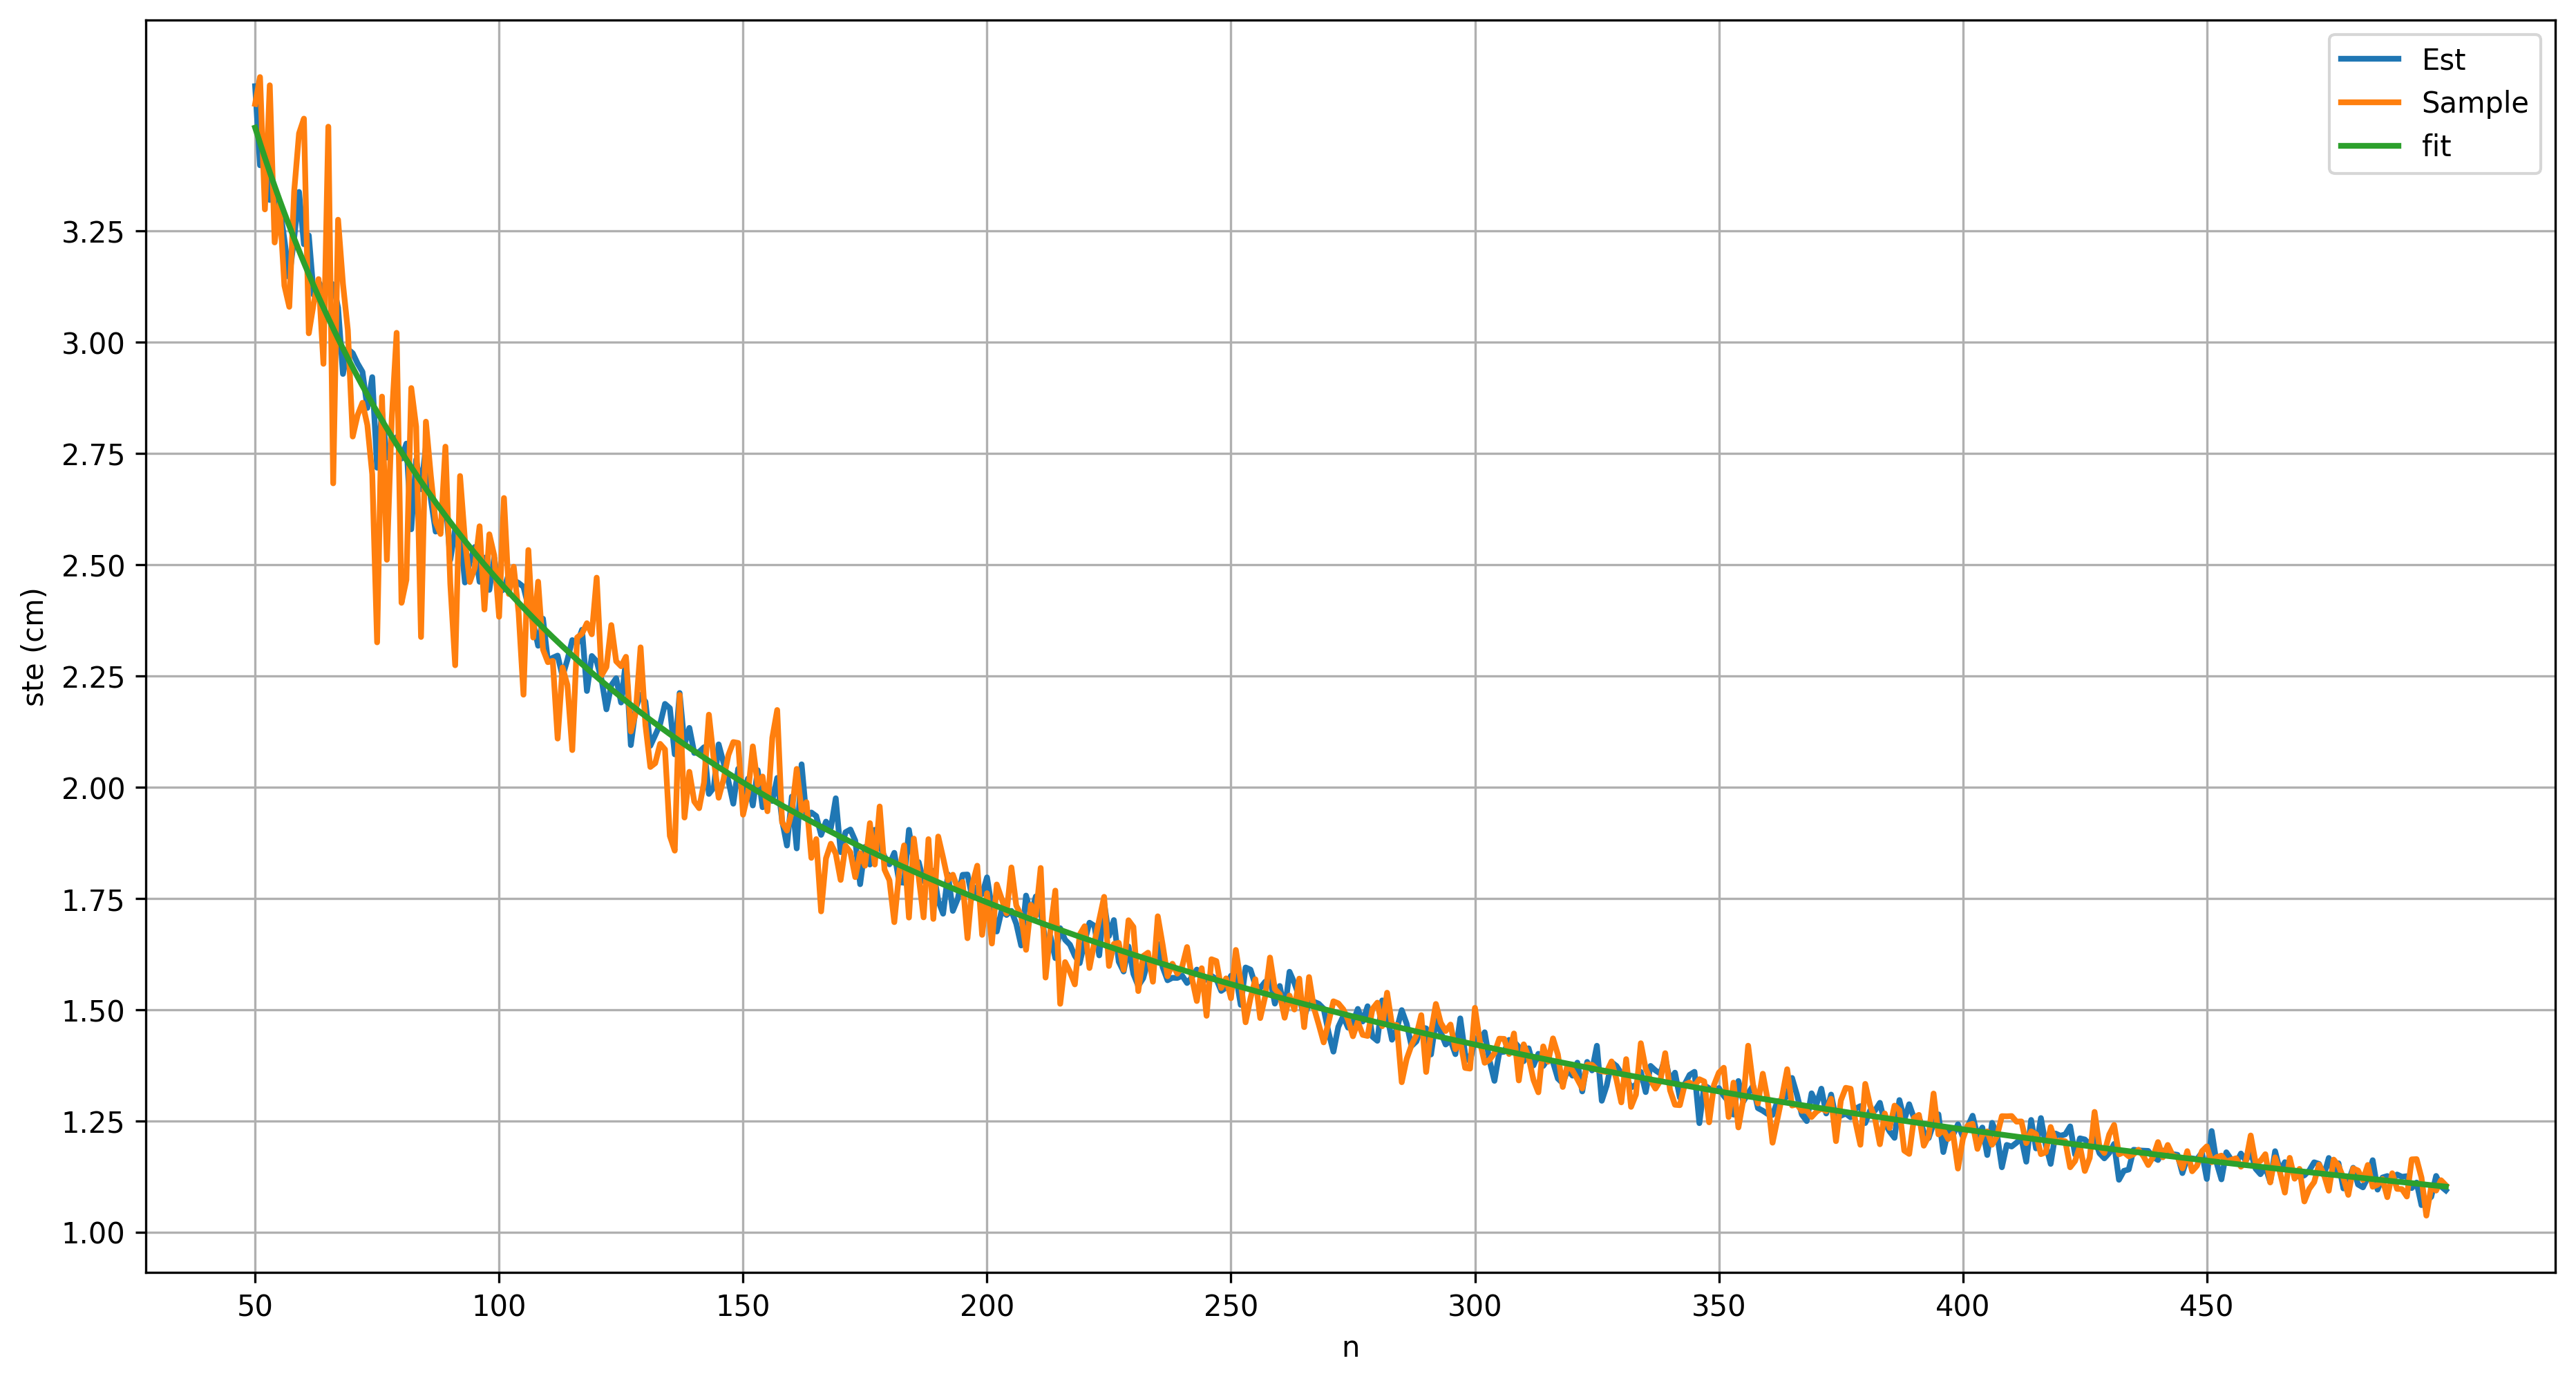

In [11]:
plt.figure(figsize=(15,8), dpi=300)
plt.plot(sample_lens, ste_est, label='Est', linewidth=2)
plt.plot(sample_lens, ste_sample, label='Sample', linewidth=2)
plt.plot(sample_lens, std_tot/sample_lens**.5, label='fit', linewidth=2)
plt.xticks(np.arange(50, 500, 50))
plt.yticks(np.arange(1, 3.5, 0.25))
plt.xlabel('n')
plt.ylabel('ste (cm)')
plt.legend()
plt.grid()
plt.show()

# La p-value

### Densité de Probabilité

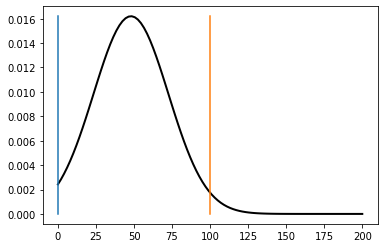

In [17]:
N = len(data)
num_bins = 20
#plt.hist(data, bins=num_bins)

x = np.linspace(0, 200, 100)
bin_width = (data.max() - data.min()) / num_bins
p = norm.pdf(x, data.mean(), data.std()) #* N * bin_width
plt.plot(x, p, 'k', linewidth=2)
plt.plot([0,0],[0, np.max(p)])
plt.plot([100,100],[0, np.max(p)])

### La probabilité cumulée

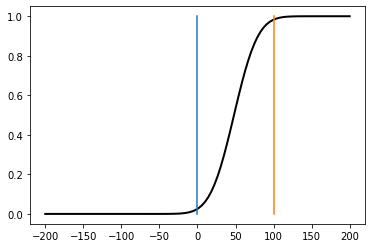

In [15]:
N = len(data)
num_bins = 20
#plt.hist(data, bins=num_bins)

x = np.linspace(-200, 200, 100)
bin_width = (data.max() - data.min()) / num_bins
p = norm.cdf(x, data.mean(), data.std()) #* N * bin_width
plt.plot(x, p, 'k', linewidth=2)
plt.plot([0,0],[0, np.max(p)])
plt.plot([100,100],[0, np.max(p)])